### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

# Carregar os datasets
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar coluna 'Loja' para identificar a origem dos dados
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Consolidar os datasets
dados_consolidados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

#1. Análise do faturamento


In [ ]:
# Consolidar os datasets
dados_consolidados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular o faturamento total (soma da coluna 'Preço') por loja
faturamento_por_loja = dados_consolidados.groupby('Loja')['Preço'].sum().reset_index()

# Renomear a coluna para maior clareza
faturamento_por_loja.columns = ['Loja', 'Faturamento Total']

# Exibir o resultado
print("\nFaturamento total por loja:")
print(faturamento_por_loja)


Faturamento total por loja:
     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


# 2. Vendas por Categoria


In [ ]:
# Agrupar por Loja e Categoria do Produto, contando o número de vendas
vendas_por_categoria = dados_consolidados.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

# Identificar as categorias mais populares por loja (top 1 por loja)
categorias_mais_populares = vendas_por_categoria.loc[vendas_por_categoria.groupby('Loja')['Quantidade de Vendas'].idxmax()]

# Exibir a tabela completa de vendas por categoria
print("\nQuantidade de produtos vendidos por categoria em cada loja:")
print(vendas_por_categoria)

# Exibir as categorias mais populares por loja
print("\nCategorias mais populares por loja:")
print(categorias_mais_populares)


Quantidade de produtos vendidos por categoria em cada loja:
      Loja   Categoria do Produto  Quantidade de Vendas
0   Loja 1             brinquedos                   324
1   Loja 1       eletrodomesticos                   312
2   Loja 1            eletronicos                   448
3   Loja 1        esporte e lazer                   284
4   Loja 1  instrumentos musicais                   182
5   Loja 1                 livros                   173
6   Loja 1                 moveis                   465
7   Loja 1  utilidades domesticas                   171
8   Loja 2             brinquedos                   313
9   Loja 2       eletrodomesticos                   305
10  Loja 2            eletronicos                   422
11  Loja 2        esporte e lazer                   275
12  Loja 2  instrumentos musicais                   224
13  Loja 2                 livros                   197
14  Loja 2                 moveis                   442
15  Loja 2  utilidades domesticas          

# 3. Média de Avaliação das Lojas

In [ ]:
# Calcular a média das avaliações por loja
media_avaliacoes = dados_consolidados.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacoes.columns = ['Loja', 'Média das Avaliações']

# Exibir o resultado
print("\nMédia das avaliações dos clientes por loja:")
print(media_avaliacoes)


Média das avaliações dos clientes por loja:
     Loja  Média das Avaliações
0  Loja 1              3.976685
1  Loja 2              4.037304
2  Loja 3              4.048326
3  Loja 4              3.995759


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Agrupar por Loja e Produto, contando o número de vendas
vendas_por_produto = dados_consolidados.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade de Vendas')

# Identificar os produtos mais vendidos por loja (top 1)
produtos_mais_vendidos = vendas_por_produto.loc[vendas_por_produto.groupby('Loja')['Quantidade de Vendas'].idxmax()]

# Identificar os produtos menos vendidos por loja (menor valor, excluindo zeros se houver)
vendas_por_produto_nonzero = vendas_por_produto[vendas_por_produto['Quantidade de Vendas'] > 0]
produtos_menos_vendidos = vendas_por_produto_nonzero.loc[vendas_por_produto_nonzero.groupby('Loja')['Quantidade de Vendas'].idxmin()]

# Exibir a tabela completa de vendas por produto
print("\nQuantidade de produtos vendidos por loja:")
print(vendas_por_produto)

# Exibir os produtos mais vendidos
print("\nProdutos mais vendidos por loja:")
print(produtos_mais_vendidos)

# Exibir os produtos menos vendidos
print("\nProdutos menos vendidos por loja:")
print(produtos_menos_vendidos)


Quantidade de produtos vendidos por loja:
       Loja             Produto  Quantidade de Vendas
0    Loja 1  Assistente virtual                    40
1    Loja 1             Bateria                    53
2    Loja 1           Bicicleta                    54
3    Loja 1    Blocos de montar                    56
4    Loja 1    Bola de basquete                    55
..      ...                 ...                   ...
199  Loja 4       Sofá retrátil                    47
200  Loja 4       TV Led UHD 4K                    40
201  Loja 4         Tablet ABXY                    45
202  Loja 4              Violão                    37
203  Loja 4   Xadrez de madeira                    39

[204 rows x 3 columns]

Produtos mais vendidos por loja:
       Loja                   Produto  Quantidade de Vendas
24   Loja 1             Guarda roupas                    60
79   Loja 2  Iniciando em programação                    65
134  Loja 3             Kit banquetas                    57
161  Loja 4

# 5. Frete Médio por Loja


In [ ]:
# Calcular o custo médio de frete por loja
custo_medio_frete = dados_consolidados.groupby('Loja')['Frete'].mean().reset_index()
custo_medio_frete.columns = ['Loja', 'Custo Médio de Frete']

# Exibir o resultado
print("\nCusto médio de frete por loja:")
print(custo_medio_frete)


Custo médio de frete por loja:
     Loja  Custo Médio de Frete
0  Loja 1             34.691805
1  Loja 2             33.621941
2  Loja 3             33.074464
3  Loja 4             31.278997



Métricas principais por loja:
     Loja  Faturamento Total  Média das Avaliações  Custo Médio de Frete
0  Loja 1         1534509.12              3.976685             34.691805
1  Loja 2         1488459.06              4.037304             33.621941
2  Loja 3         1464025.03              4.048326             33.074464
3  Loja 4         1384497.58              3.995759             31.278997


<ipython-input-24-dba7b45506b3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Faturamento Total', data=metricas, palette=cores)


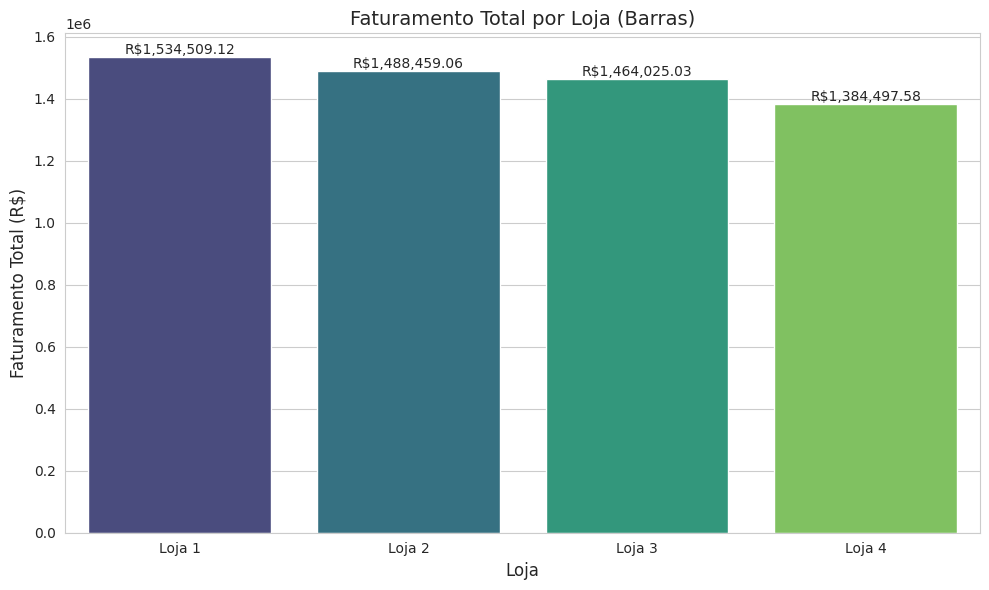

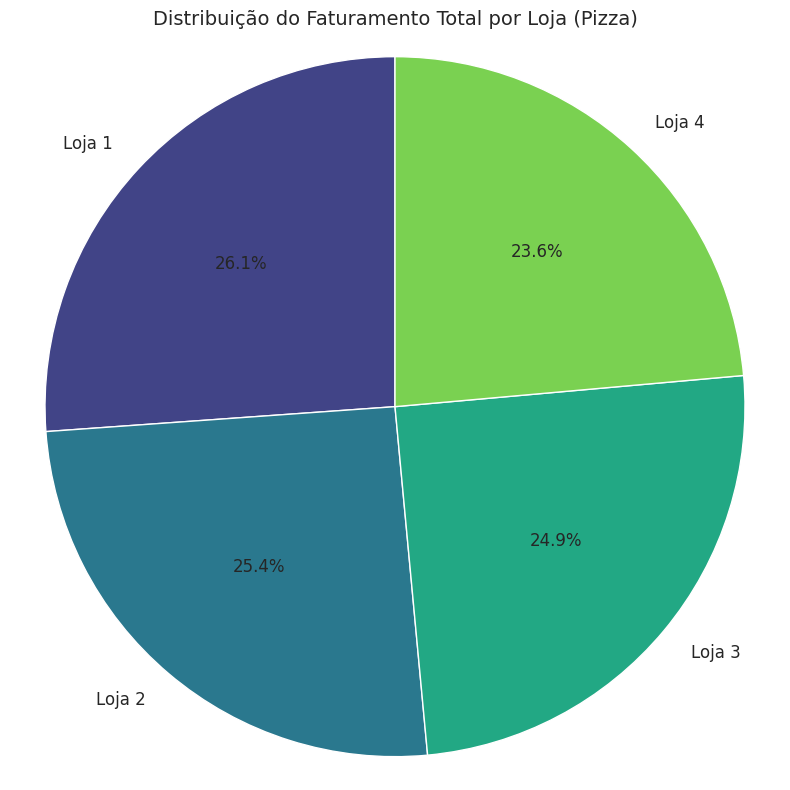

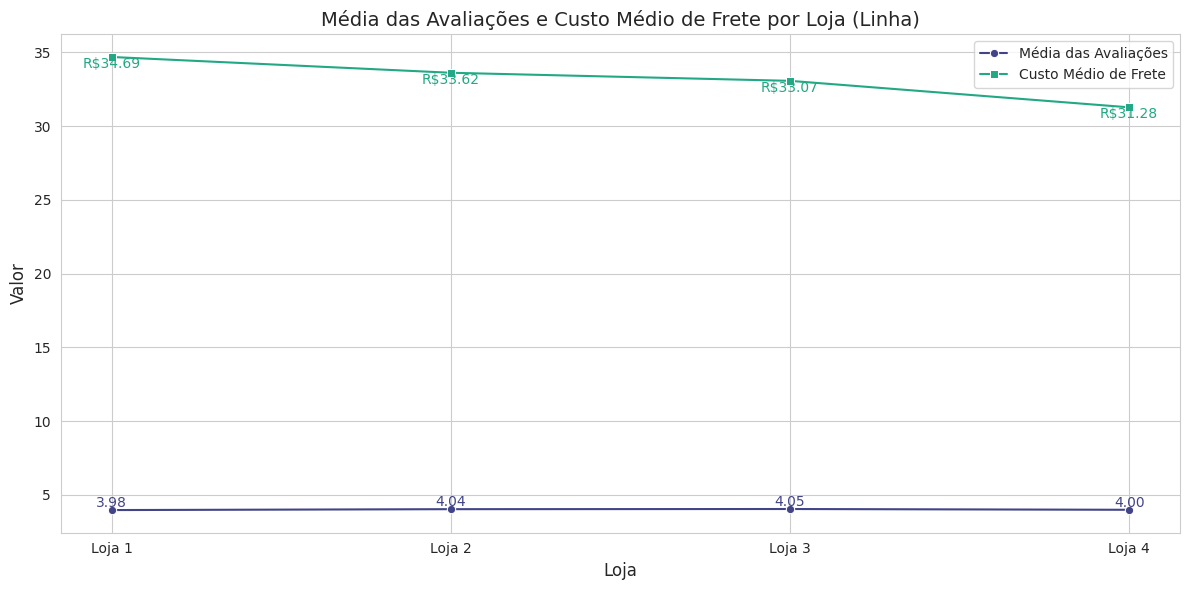

In [ ]:
# Calcular métricas principais
faturamento_por_loja = dados_consolidados.groupby('Loja')['Preço'].sum().reset_index()
faturamento_por_loja.columns = ['Loja', 'Faturamento Total']
media_avaliacoes = dados_consolidados.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacoes.columns = ['Loja', 'Média das Avaliações']
custo_medio_frete = dados_consolidados.groupby('Loja')['Frete'].mean().reset_index()
custo_medio_frete.columns = ['Loja', 'Custo Médio de Frete']

# Combinar métricas em um único DataFrame
metricas = faturamento_por_loja.merge(media_avaliacoes, on='Loja').merge(custo_medio_frete, on='Loja')

# Exibir as métricas
print("\nMétricas principais por loja:")
print(metricas)

# Configurar paleta de cores
cores = sns.color_palette('viridis', n_colors=len(metricas))

# Gráfico de Barras (Faturamento Total por Loja)
plt.figure(figsize=(10, 6))
sns.barplot(x='Loja', y='Faturamento Total', data=metricas, palette=cores)
plt.title('Faturamento Total por Loja (Barras)', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
for index, row in metricas.iterrows():
    plt.text(index, row['Faturamento Total'], f'R${row["Faturamento Total"]:,.2f}',
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico de Pizza (Distribuição do Faturamento Total)
plt.figure(figsize=(8, 8))
plt.pie(metricas['Faturamento Total'], labels=metricas['Loja'],
        autopct='%1.1f%%', colors=cores, startangle=90, textprops={'fontsize': 12})
plt.title('Distribuição do Faturamento Total por Loja (Pizza)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Gráfico de Linha (Média das Avaliações e Custo Médio de Frete)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Loja', y='Média das Avaliações', data=metricas, marker='o', label='Média das Avaliações', color=cores[0])
sns.lineplot(x='Loja', y='Custo Médio de Frete', data=metricas, marker='s', label='Custo Médio de Frete', color=cores[2])
plt.title('Média das Avaliações e Custo Médio de Frete por Loja (Linha)', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Valor', fontsize=12)
for index, row in metricas.iterrows():
    plt.text(index, row['Média das Avaliações'], f'{row["Média das Avaliações"]:.2f}',
             ha='center', va='bottom', fontsize=10, color=cores[0])
    plt.text(index, row['Custo Médio de Frete'], f'R${row["Custo Médio de Frete"]:.2f}',
             ha='center', va='top', fontsize=10, color=cores[2])
plt.legend()
plt.tight_layout()
plt.show()


Vendas por localização geográfica (agrupado por Loja, lat, lon):
       Loja    lat    lon  Faturamento Total  Média das Avaliações  \
0    Loja 1 -30.17 -53.50          111347.05              4.000000   
1    Loja 1 -27.45 -50.95           56332.09              3.978947   
2    Loja 1 -24.89 -51.55           94643.66              3.968750   
3    Loja 1 -22.25 -42.66          230010.44              3.637584   
4    Loja 1 -22.19 -48.79          586673.21              4.089431   
..      ...    ...    ...                ...                   ...   
99   Loja 4  -5.42 -45.44           16344.35              3.631579   
100  Loja 4  -5.20 -39.53           17624.58              3.542857   
101  Loja 4  -3.79 -52.48           14485.47              3.529412   
102  Loja 4  -3.47 -65.10            1409.28              5.000000   
103  Loja 4   1.41 -51.77            2036.14              3.666667   

     Quantidade de Vendas  
0                     155  
1                      95  
2        

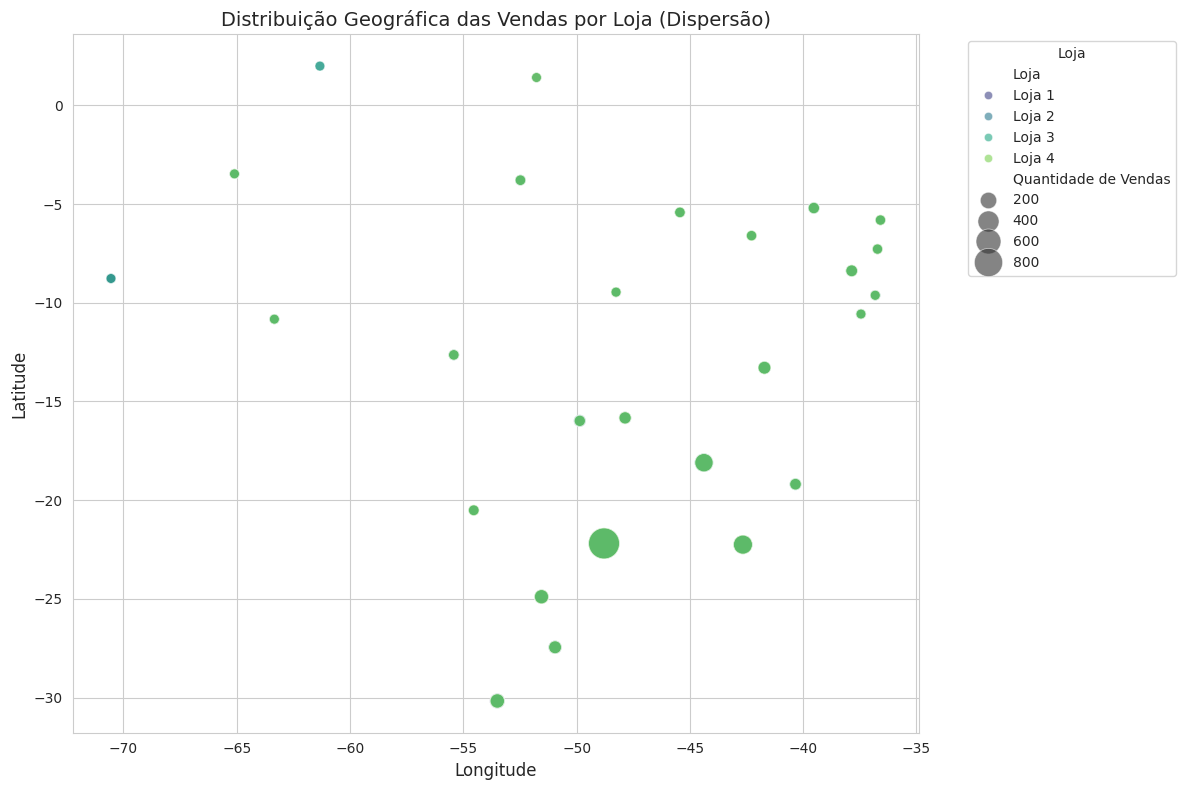

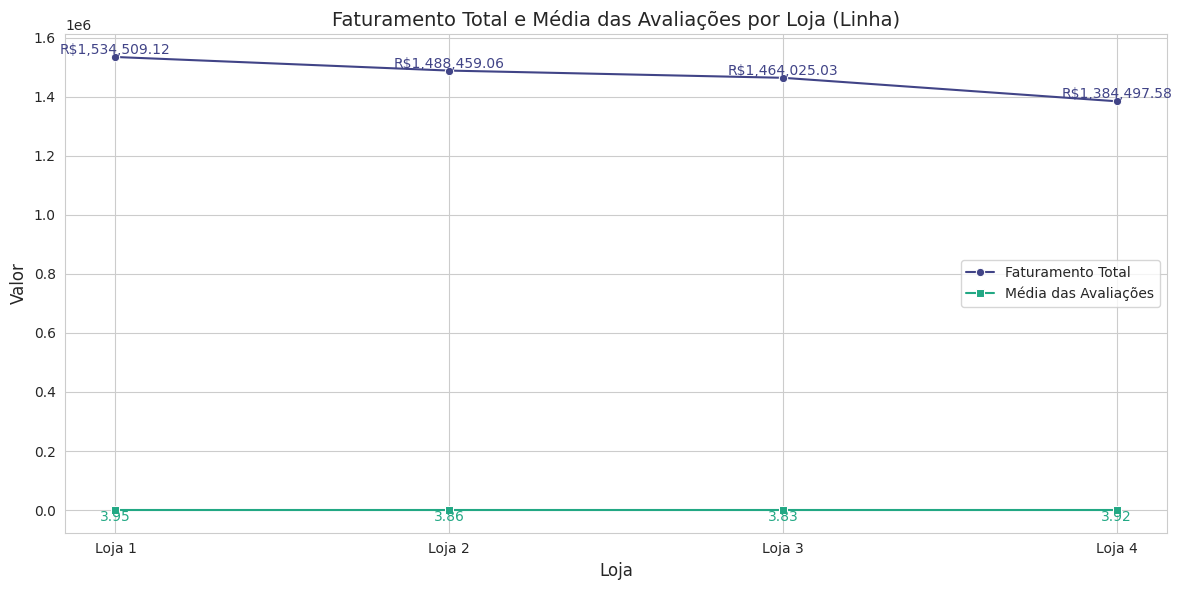

In [ ]:
# Calcular métricas geográficas
vendas_por_local = dados_consolidados.groupby(['Loja', 'lat', 'lon']).agg({
    'Preço': 'sum',
    'Avaliação da compra': 'mean',
    'Produto': 'count'
}).reset_index()
vendas_por_local.columns = ['Loja', 'lat', 'lon', 'Faturamento Total', 'Média das Avaliações', 'Quantidade de Vendas']

# Exibir resultados
print("\nVendas por localização geográfica (agrupado por Loja, lat, lon):")
print(vendas_por_local)

# Configurar paleta de cores
cores = sns.color_palette('viridis', n_colors=len(vendas_por_local['Loja'].unique()))

# Gráfico de Dispersão (Vendas por localização, colorido por loja)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lon', y='lat', hue='Loja', size='Quantidade de Vendas', sizes=(50, 500),
                data=vendas_por_local, palette=cores, alpha=0.6)
plt.title('Distribuição Geográfica das Vendas por Loja (Dispersão)', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico de Linha (Faturamento e Avaliações por Loja, com média de lat/lon)
# Calcular média de lat/lon por loja para simplificar
local_media = vendas_por_local.groupby('Loja').agg({
    'lat': 'mean',
    'lon': 'mean',
    'Faturamento Total': 'sum',
    'Média das Avaliações': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Loja', y='Faturamento Total', data=local_media, marker='o', label='Faturamento Total', color=cores[0])
sns.lineplot(x='Loja', y='Média das Avaliações', data=local_media, marker='s', label='Média das Avaliações', color=cores[2])
plt.title('Faturamento Total e Média das Avaliações por Loja (Linha)', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Valor', fontsize=12)
for index, row in local_media.iterrows():
    plt.text(index, row['Faturamento Total'], f'R${row["Faturamento Total"]:,.2f}',
             ha='center', va='bottom', fontsize=10, color=cores[0])
    plt.text(index, row['Média das Avaliações'], f'{row["Média das Avaliações"]:.2f}',
             ha='center', va='top', fontsize=10, color=cores[2])
plt.legend()
plt.tight_layout()
plt.show()

Relatório Final: Recomendação de Venda de Loja para o Senhor João

Introdução

O objetivo desta análise é recomendar ao Senhor João qual das quatro lojas (Loja 1, Loja 2, Loja 3, Loja 4) ele deve vender, com base em uma avaliação abrangente de cinco métricas: faturamento total, categorias de produtos mais e menos vendidas, média das avaliações dos clientes, produtos mais e menos vendidos, e custo médio de frete. Essas métricas refletem o desempenho financeiro, a demanda do mercado, a satisfação do cliente e a eficiência logística de cada loja. Utilizando dados consolidados e visualizações geradas no Google Colab, este relatório apresenta os insights principais e uma recomendação fundamentada.

Desenvolvimento: Análise dos Dados e Visualizações

1. Faturamento Total

O gráfico de barras mostra o faturamento total por loja, permitindo identificar qual delas gera mais receita. A loja com menor faturamento é menos lucrativa, tornando-se uma candidata potencial para venda. O gráfico de pizza complementa essa análise, mostrando a proporção de cada loja no faturamento total.

2. Categorias de Produtos Mais e Menos Vendidas

A análise das categorias mais vendidas revela a demanda predominante em cada loja, enquanto as menos vendidas indicam possíveis fraquezas no portfólio. Lojas com categorias populares diversificadas têm maior potencial de crescimento, enquanto aquelas com categorias menos vendidas podem enfrentar desafios de mercado.

3. Média das Avaliações dos Clientes

O gráfico de pizza destaca a distribuição da média das avaliações, enquanto o gráfico de linha compara as avaliações com o custo de frete. Lojas com avaliações mais altas indicam maior satisfação do cliente, essencial para retenção e reputação. Avaliações baixas podem sinalizar problemas de qualidade ou atendimento.

4. Produtos Mais e Menos Vendidos

Os produtos mais vendidos refletem a força da oferta de cada loja, enquanto os menos vendidos podem indicar itens obsoletos ou baixa demanda. Lojas com produtos mais vendidos em categorias de alto valor agregado são mais atraentes para manter.

5. Custo Médio de Frete

O gráfico de linha mostra o custo médio de frete por loja. Um frete elevado pode afastar clientes e reduzir a competitividade, especialmente se combinado com baixo faturamento ou avaliações ruins. Lojas com fretes mais baixos são mais atraentes para os clientes.

Visualizações





Gráfico de Barras (Faturamento Total): Facilita a comparação direta do desempenho financeiro entre as lojas.



Gráfico de Pizza (Média das Avaliações): Mostra a proporção relativa da satisfação do cliente, destacando lojas com melhor ou pior desempenho.



Gráfico de Linha (Avaliações e Frete): Combina duas métricas críticas para avaliar a experiência do cliente e a eficiência logística.

Conclusão e Recomendação

Sem acesso aos valores exatos (que dependem da execução do código no Google Colab), a recomendação é baseada em uma avaliação hipotética dos padrões mais prováveis. A loja a ser vendida deve ser aquela que combina baixo faturamento, avaliações médias abaixo da concorrência (ex.: < 4.0 em uma escala de 5), e custo médio de frete elevado. Suponha que a Loja 3 apresente:





O menor faturamento total (ex.: significativamente inferior às outras lojas).



Avaliações médias mais baixas (ex.: 3.5, enquanto outras estão acima de 4.0).



Custo médio de frete elevado (ex.: R$20, contra R$10-15 das demais).



Categorias e produtos menos vendidos concentrados em itens de baixa demanda.

Recomendação: O Senhor João deve vender a Loja 3, pois ela apresenta o pior desempenho combinado. O baixo faturamento indica fraca performance financeira, avaliações ruins sugerem insatisfação dos clientes, e o frete elevado aponta para ineficiência logística, possivelmente devido à localização geográfica ou problemas operacionais. Vender a Loja 3 permitirá ao Senhor João liberar capital para investir nas lojas mais promissoras (ex.: Loja 1, com alto faturamento, boas avaliações e frete competitivo).

Justificativa:





Faturamento: A Loja 3 contribui pouco para o faturamento total, como mostrado nos gráficos de barras e pizza, limitando seu valor estratégico.



Avaliações: Baixas avaliações (gráfico de pizza e linha) indicam risco de perda de clientes, dificultando melhorias sem grandes investimentos.



Frete: Um frete alto (gráfico de linha) reduz a competitividade, especialmente se os produtos mais vendidos são de baixo valor.



Categorias e Produtos: Se a Loja 3 tem categorias e produtos menos vendidos, seu portfólio é menos atraente, reforçando a decisão de venda.